<img src="https://gist.githubusercontent.com/jakubczakon/10e5eb3d5024cc30cdb056d5acd3d92f/raw/5c464c16ccbc7150b4025e0a2a05b84ab99a7bc3/logo_DS_AI.png" alt="Drawing" width="600"/>

# PoweRR x deepsense.ai

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/MyDrive/PoweRR/

/content/drive/MyDrive/PoweRR


## Pierwsze spojrzenie na dane

Zanim dokonamy **jakiegokolwiek** uczenia maszynowego - kluczowe jest, aby zaznajomić się z danymi. Przeczytanie opisu danych jest istotne, lecz nie jest wystarczające!

Problemy które możemy napotkać:

* brakujące wartości (czy są? jak często? skorelowane?),
* różne formaty danych (np. kod pocztowy w różnych formatach stringów),
* brak konsekwencji w oznaczeniach (np. "USA" i "United States of America" jako oznaczenia tego samego kraju),
* dane nie są zbalansowane,
* odstające wartości,
* jednostki (np. czas w sekundach, dochód w lokalnej walucie).

Estymuje się, że około 80% pracy osoby na stanowisku Data Scientist opiera się na czyszczeniu, przetwarzaniu i przygotowywaniu danych.

In [4]:
data = pd.read_csv('./healthcare-dataset-stroke-data.csv', delimiter = ',', encoding = 'utf-8')
data.head(3).T

,0,1,2
id,9046,51676,31112
gender,Male,Female,Male
age,67.0,61.0,80.0
hypertension,0,0,0
heart_disease,1,0,1
ever_married,Yes,Yes,Yes
work_type,Private,Self-employed,Private
Residence_type,Urban,Rural,Rural
avg_glucose_level,228.69,202.21,105.92
bmi,36.6,NaN,32.5


In [5]:
# typy danych
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [13]:
# brakujące wartości?
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
data.describe(exclude = 'object')

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


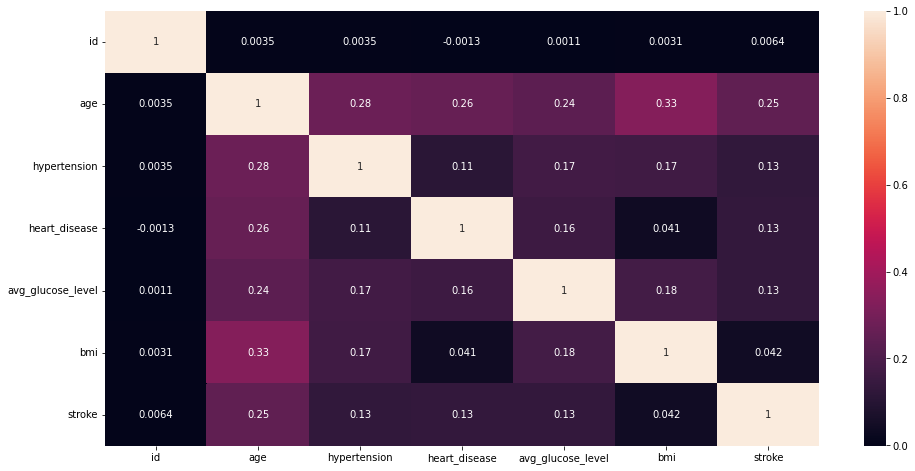

In [7]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(), annot=True)

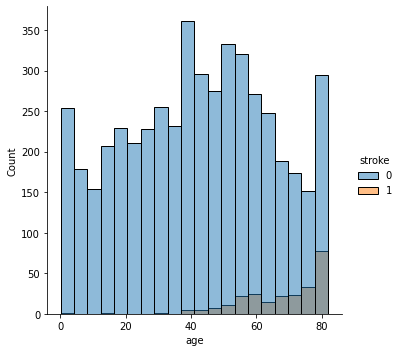

In [8]:
sns.displot(x='age', hue='stroke', data=data, alpha=0.5)

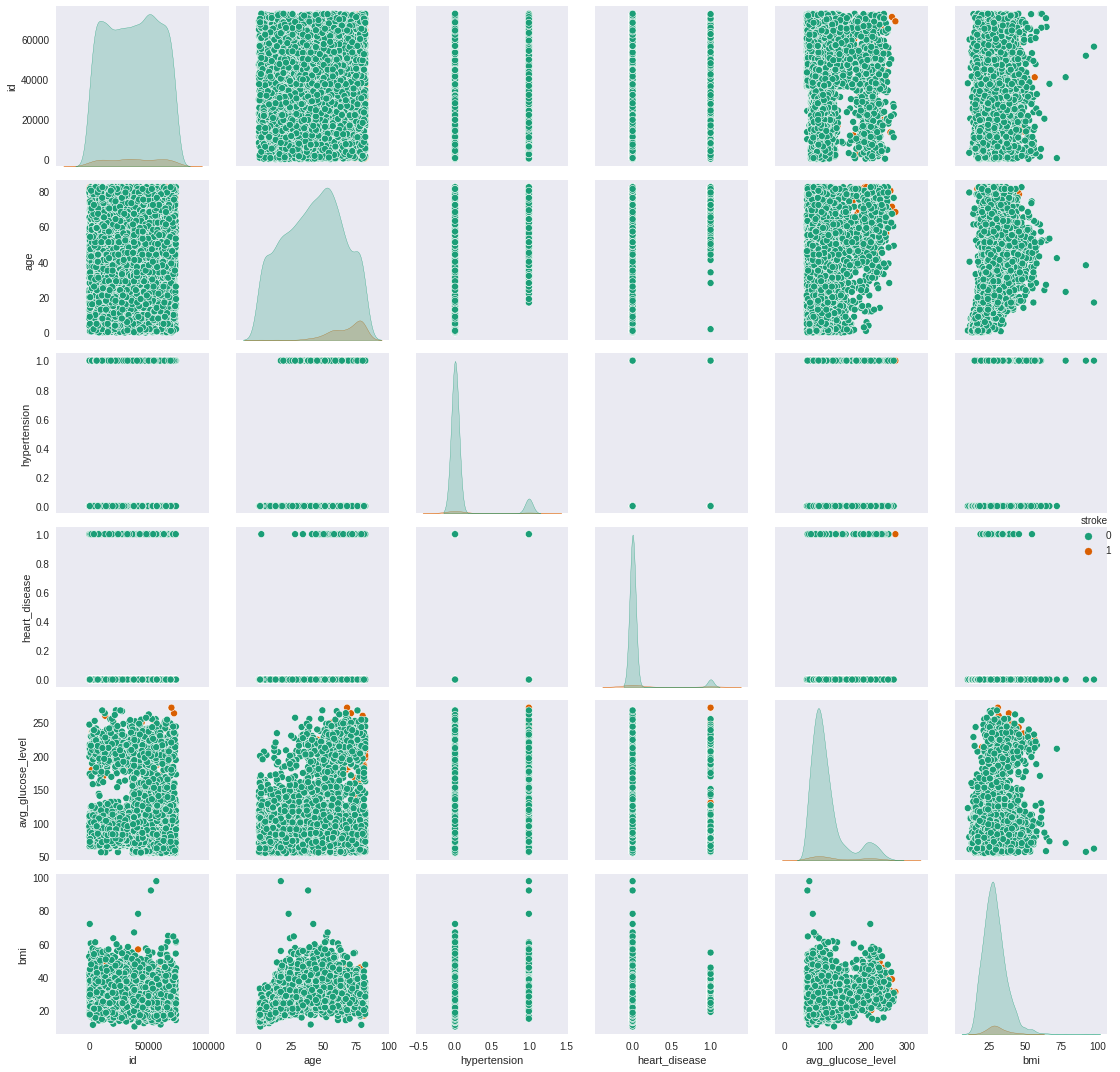

In [14]:
plt.style.use('seaborn-dark')
sns.pairplot(data,hue='stroke',palette='Dark2');
plt.tight_layout()